In [47]:
1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [5]:
2
df=pd.read_csv("Downloads/Iris.csv")
print(df)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [6]:
2
df=df.drop(columns='Species')
print(df)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0      1            5.1           3.5            1.4           0.2
1      2            4.9           3.0            1.4           0.2
2      3            4.7           3.2            1.3           0.2
3      4            4.6           3.1            1.5           0.2
4      5            5.0           3.6            1.4           0.2
..   ...            ...           ...            ...           ...
145  146            6.7           3.0            5.2           2.3
146  147            6.3           2.5            5.0           1.9
147  148            6.5           3.0            5.2           2.0
148  149            6.2           3.4            5.4           2.3
149  150            5.9           3.0            5.1           1.8

[150 rows x 5 columns]


In [7]:
3
print(df.head(5))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0   1            5.1           3.5            1.4           0.2
1   2            4.9           3.0            1.4           0.2
2   3            4.7           3.2            1.3           0.2
3   4            4.6           3.1            1.5           0.2
4   5            5.0           3.6            1.4           0.2


In [8]:
4
X = df[['SepalLengthCm', 'SepalWidthCm']]


In [21]:
5
from sklearn.cluster import KMeans


In [58]:
6
wcss = []
kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
kmeans.fit(X)


KMeans(n_clusters=10, n_init=10, random_state=42)

In [62]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, max_iter=100, n_init='auto')
kmeans.fit(X)

df['cluster'] = kmeans.labels_  # ← Corrected line
print(df)


      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  cluster
0      1            5.1           3.5            1.4           0.2        2
1      2            4.9           3.0            1.4           0.2        2
2      3            4.7           3.2            1.3           0.2        2
3      4            4.6           3.1            1.5           0.2        2
4      5            5.0           3.6            1.4           0.2        2
..   ...            ...           ...            ...           ...      ...
145  146            6.7           3.0            5.2           2.3        1
146  147            6.3           2.5            5.0           1.9        0
147  148            6.5           3.0            5.2           2.0        1
148  149            6.2           3.4            5.4           2.3        1
149  150            5.9           3.0            5.1           1.8        0

[150 rows x 6 columns]


In [55]:
7
wcss = []  # Clear it in case it's already filled

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

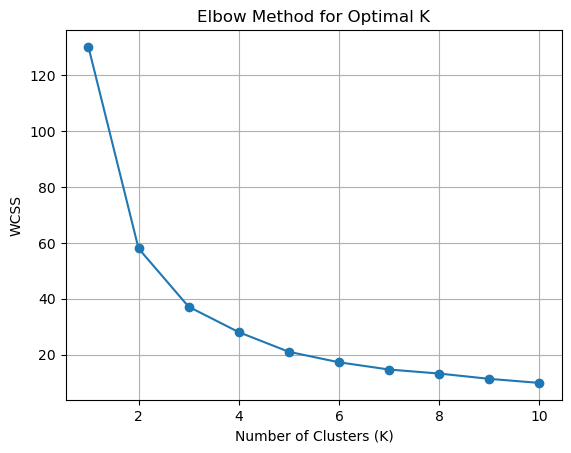

In [56]:
8
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [ ]:
10
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)  # This shows the cluster index (0-4) for each data point


In [ ]:
plt.figure(figsize=(8,6))

# Plot each cluster
plt.scatter(X[y_kmeans == 0]['SepalLengthCm'], X[y_kmeans == 0]['SepalWidthCm'], s=50, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1]['SepalLengthCm'], X[y_kmeans == 1]['SepalWidthCm'], s=50, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2]['SepalLengthCm'], X[y_kmeans == 2]['SepalWidthCm'], s=50, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3]['SepalLengthCm'], X[y_kmeans == 3]['SepalWidthCm'], s=50, c='cyan', label='Cluster 4')
plt.scatter(X[y_kmeans == 4]['SepalLengthCm'], X[y_kmeans == 4]['SepalWidthCm'], s=50, c='magenta', label='Cluster 5')

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='yellow', label='Centroids', marker='X')

plt.title('Clusters of Sepal Dimensions (K=5)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.grid(True)
plt.show()


In [51]:

x_axis=np.array([1,2,3,18,19,20,19,25,20])
y_axis=np.array([1,2,3,18,19,20,29,25,20])

data=pd.DataFrame({'x':x_axis,'y':y_axis})
print(data)

    x   y
0   1   1
1   2   2
2   3   3
3  18  18
4  19  19
5  20  20
6  19  29
7  25  25
8  20  20


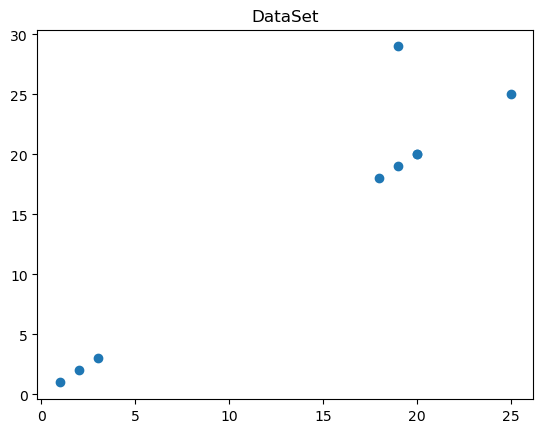

In [52]:
plt.plot()
plt.title("DataSet")
plt.scatter(x_axis,y_axis)
plt.show()


Sum of square Error/WCSS is: 35.5


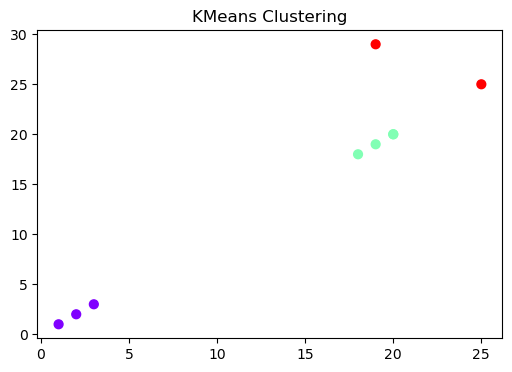

In [53]:
kmeans = KMeans(n_clusters=3, max_iter=100, n_init='auto')
kmeans.fit(data)

print('\nSum of square Error/WCSS is:', kmeans.inertia_)
plt.figure(figsize=(6, 4))
plt.title("KMeans Clustering")
plt.scatter(x_axis, y_axis, c=kmeans.labels_, cmap='rainbow', s=40)

plt.show()

In [54]:
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=100, n_init='auto').fit(data)
    print('k-value', k, '\n sum o square error/wcss', kmeans.inertia_)

k-value 1 
 sum o square error/wcss 1572.4444444444443
k-value 2 
 sum o square error/wcss 125.66666666666666
k-value 3 
 sum o square error/wcss 35.5
k-value 4 
 sum o square error/wcss 9.5
k-value 5 
 sum o square error/wcss 6.5
k-value 6 
 sum o square error/wcss 4.0
k-value 7 
 sum o square error/wcss 1.0
k-value 8 
 sum o square error/wcss 0.0
k-value 9 
 sum o square error/wcss 0.0


/tmp/ipykernel_3613/1056141479.py:2: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, max_iter=100, n_init='auto').fit(data)
